# Heatmap: parties vs document types

In [ ]:
import sys

!{sys.executable} -m pip install seaborn

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=29f3f1f8815079affea8b7b58671d353bc95cc31b15bba62724f3a65ca1e06c4
  Stored in directory: /Users/kalyan/Library/Caches/pip/wheels/c2/46/f4/caa1bee71096d7b0cdca2f2a2af45cacf35c5760bee8f00948
Successfully built wikipedia


In [1]:
import sys

sys.path.append("../../..")
import os

from pathlib import Path
import itertools
from collections import Counter

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from src.opensearch.index_data import get_dataset_and_filter_values

In [4]:
data = pd.read_csv(
    "/Users/kalyan/Documents/CPR/unfccc-global-stocktake-documents/CPR_UNFCCC_MASTER.csv"
)
data["Year"] = data["Date"].apply(lambda i: int(i[:4]))
data[["Author", "Submission Type"]] = data[["Author", "Submission Type"]].applymap(
    lambda i: i.split(",")
)

In [7]:
data[data["Author Type"] == "Non-Party"].explode(column="Author")[
    "Author"
].value_counts()[:200]

UNFCCC Secretariat                                                         215
IPCC                                                                        64
Marrakech Partnership                                                       14
Center for Climate and Energy Solutions (C2ES)                               8
Institute for Global Environmental Strategies (IGES)                         8
                                                                          ... 
Fundación Avina                                                              1
Climate Heritage Network                                                     1
Food and Agriculture Organization of the United Nations (FAO)                1
Global CCS Institute                                                         1
International Federation of Red Cross and Red Crescent Societies (IFRC)      1
Name: Author, Length: 200, dtype: int64

In [10]:
data.head()

,Category,Submission Type,Family Name,Document Title,Documents,Author,Author Type,Geography,Geography ISO,Date,...,Document Variant,Language,CPR Collection ID,CPR Document ID,CPR Family ID,CPR Family Slug,CPR Document Slug,CPR Document Status,Download URL,Year
0,UNFCCC,Submission to the Global Stocktake,"""Matters Relating to the Global Stocktake refe...","""Matters Relating to the Global Stocktake refe...",https://unfccc.int/sites/default/files/resourc...,"India,Like-minded Developing Countries (LMDC)",Party,International,XAB,2022-05-23,...,NaN,NaN,NaN,UNFCCC.party.1.0,UNFCCC.family.1.0,matters-relating-to-the-global-stocktake-refer...,matters-relating-to-the-global-stocktake-refer...,PUBLISHED,https://cpr-dataset-unfccc-pdfs.s3-eu-west-1.a...,2022
1,UNFCCC,Submission to the Global Stocktake,(Joint) Submission to the first Global Stockta...,(Joint) Submission to the first Global Stockta...,https://unfccc.int/sites/default/files/resourc...,"Nature Conservancy (TNC),Institute for Global ...",Non-Party,NaN,NaN,2022-04-13,...,NaN,NaN,NaN,UNFCCC.non-party.2.0,UNFCCC.family.2.0,joint-submission-to-the-first-global-stocktake...,joint-submission-to-the-first-global-stocktake...,PUBLISHED,https://cpr-dataset-unfccc-pdfs.s3-eu-west-1.a...,2022
2,UNFCCC,Long-Term Low-Emission Development Strategy,2050 Carbon Neutral Strategy of the Republic o...,2050 Carbon Neutral Strategy of the Republic o...,https://unfccc.int/sites/default/files/resourc...,South Korea,Party,South Korea,KOR,2020-12-31,...,NaN,NaN,NaN,UNFCCC.party.3.0,UNFCCC.family.3.0,2050-carbon-neutral-strategy-of-the-republic-o...,2050-carbon-neutral-strategy-of-the-republic-o...,PUBLISHED,https://cpr-dataset-unfccc-pdfs.s3-eu-west-1.a...,2020
3,UNFCCC,National Adaptation Plan,Accompanying information: Australian National ...,Accompanying information: Australian National ...,https://unfccc.int/sites/default/files/resourc...,Australia,Party,Australia,AUS,2021-10-29,...,NaN,NaN,NaN,UNFCCC.party.4.0,UNFCCC.family.4.0,accompanying-information-australian-national-c...,accompanying-information-australian-national-c...,PUBLISHED,https://cpr-dataset-unfccc-pdfs.s3-eu-west-1.a...,2021
4,UNFCCC,Submission to the Global Stocktake,Achieving Net-Zero Prosperity How Governments ...,Achieving Net-Zero Prosperity How Governments ...,https://unfccc.int/sites/default/files/resourc...,Institute for Sustainable Development and Inte...,Non-Party,NaN,NaN,2022-08-29,...,NaN,NaN,NaN,UNFCCC.non-party.5.0,UNFCCC.family.5.0,achieving-net-zero-prosperity-how-governments-...,achieving-net-zero-prosperity-how-governments-...,PUBLISHED,https://cpr-dataset-unfccc-pdfs.s3-eu-west-1.a...,2022


<Axes: xlabel='Submission Type', ylabel='Author'>

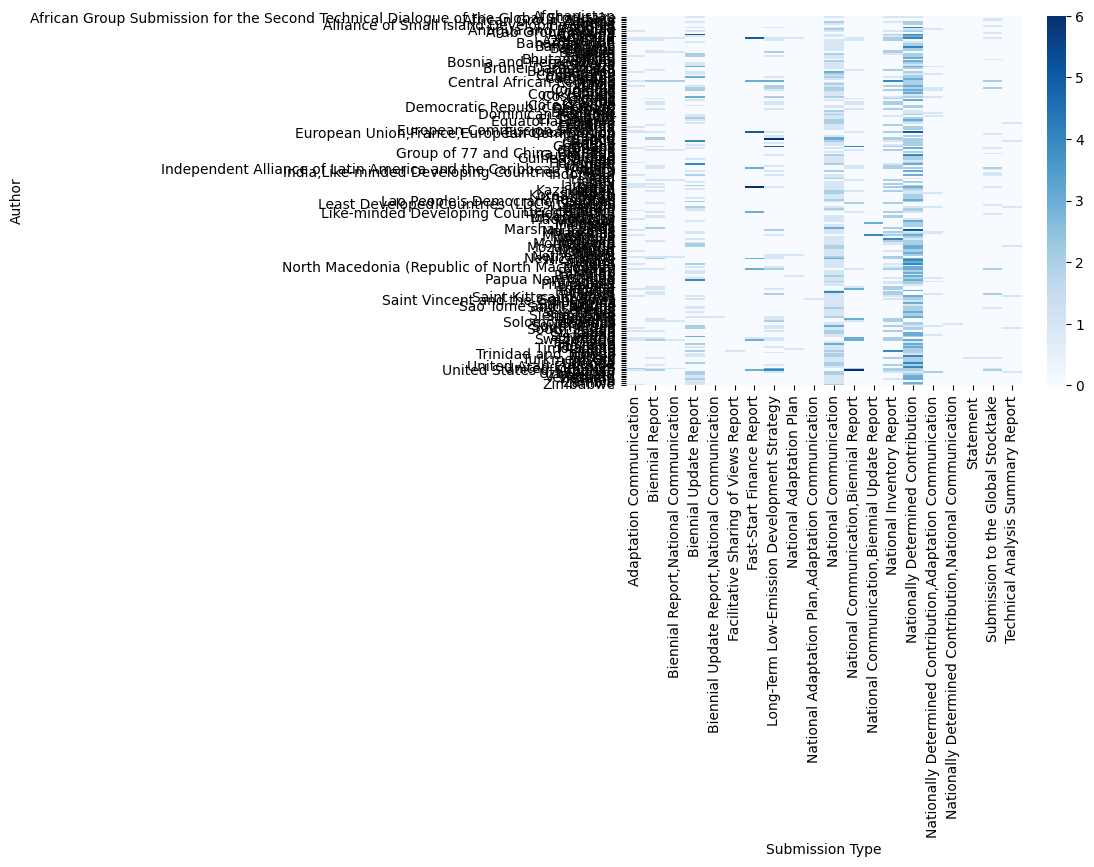

In [11]:
data_parties = data[data["Author Type"] == "Party"]

party_document_type_pivot = (
    data_parties.pivot_table(
        values="Category", aggfunc=len, index="Author", columns="Submission Type"
    )
    .fillna(0)
    .astype(int)
)

party_document_type_pivot_most_recent_year = (
    data_parties.pivot_table(
        values="Year", aggfunc="max", index="Author", columns="Submission Type"
    )
    .fillna(0)
    .astype(int)
)


sns.heatmap(
    party_document_type_pivot,
    cmap="Blues",
    annot=False,
    fmt="d",
    cbar=True,
    yticklabels=party_document_type_pivot.index.tolist(),
)

In [12]:
party_document_type_pivot.stack().reset_index().rename(columns={0: "Count"}).to_csv(
    "parties-vs-doc-types.csv", index=False
)
party_document_type_pivot_most_recent_year.stack().reset_index().rename(
    columns={0: "Year"}
).to_csv("parties-vs-doc-types-most-recent-year.csv", index=False)